# Car Insurance Analysis  
**by Caleb Chijindu Ugorji**

## Introduction
> This data set was provided by Data DNA for the Onyx Data Challenge for the month of August. It is an insurance company customer data. Data consists of information about the customer, the car, the car use, claim frequency and claim amount



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe

insurance = pd.read_excel('Onyx Data DataDNA Dataset Challenge - Car Insurance Policies - August 2023.xlsx', sheet_name = 'Insurance Policies')

In [3]:
insurance.head(10)

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income
0,62-2999778,09/08/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43
2,08-3808219,08/03/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70
3,38-0306843,10/05/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23
5,07-4760971,06/11/1963,Single,Private,Male,1,Yes,PhD,Mercedes-Benz,CLK-Class,Maroon,1999,3,Rural,71935.14,212072.46
6,36-8207139,8/27/1999,Single,Private,Male,0,No,High School,Toyota,Matrix,Yellow,2006,0,Rural,21611.15,87875.66
7,57-6123340,2/26/1980,Married,Private,Male,0,No,Bachelors,Lincoln,Continental Mark VII,Crimson,1989,2,Highly Rural,24447.74,167681.37
8,47-9063798,06/10/1950,Single,Private,Male,2,Yes,High School,Mazda,323,Goldenrod,1995,0,Rural,40437.12,116304.98
9,92-8406214,12/18/1992,Single,Private,Female,0,No,High School,Ford,F350,Red,1994,0,Suburban,32119.83,111742.45


In [4]:
# inspecting the dataset
insurance.shape

(37542, 16)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37542 entries, 0 to 37541
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                37542 non-null  object 
 1   birthdate         37542 non-null  object 
 2   marital_status    37542 non-null  object 
 3   car_use           37542 non-null  object 
 4   gender            37542 non-null  object 
 5   kids_driving      37542 non-null  int64  
 6   parent            37542 non-null  object 
 7   education         37542 non-null  object 
 8   car_make          37542 non-null  object 
 9   car_model         37542 non-null  object 
 10  car_color         37542 non-null  object 
 11  car_year          37542 non-null  int64  
 12  claim_freq        37542 non-null  int64  
 13  coverage_zone     37542 non-null  object 
 14  claim_amt         37542 non-null  float64
 15  household_income  37542 non-null  float64
dtypes: float64(2), int64(3), object(11)
memo

In [6]:
insurance.duplicated().any().sum()

0

In [7]:
insurance.nunique()

ID                  37541
birthdate           16526
marital_status          4
car_use                 2
gender                  2
kids_driving            4
parent                  2
education               4
car_make               78
car_model            1011
car_color              19
car_year               64
claim_freq              5
coverage_zone           5
claim_amt           37474
household_income    37502
dtype: int64

## Observations

#### Structure of the data
* The data contains 16 variables and 37542 observations. The range index is 0 to 37541. Of the 16 variables, there are two float64, three int64, and eleven object data types. There are no missing values. There are no duplicated entries(observations). 

#### Data quality issues
* Wrong data type for the birthdate variable

##  Definition of some key variables
* Claim frequency: refers to the rate at which policyholders or insured individuals file claims for damages, losses, or other covered events. It is a measure of how often accidents, incidents, or other covered events occur that lead to the submission of insurance claims.
* Claim amount: refers to the monetary value or cost associated with a specific insurance claim.
* Coverage zone: refers to the geographical area or region where an insurance policy provides coverage.
* Car use: The reason of having a car. Either private, commercial

## My main features of interest in the dataset?

**Here are my interests in this dataset**
  * The car make and model that is associated with higher claim frequency
  * The car makes and model that is associated with higher claim amount
  * The coverage zone with the most claim frequenct
  * The age range associated with higher claim frequency
  * The gender associated with higher claim frequency
  * The car use associated with higher claim frequency
  * Relationship between household income and claim amount
  
### Feature engineering
**In order to carry out this analyses, some new variables have to be created from the given ones. These variables are**
- age
- age category ( young, adult, aged)

## Data cleaning

In [8]:
#making a copy of the dataset
insurance_copy = insurance.copy()

##### Define: fix the datatype problem.
* change birthday variable datatype to datetime 

In [9]:
#code
insurance['birthdate'] = pd.to_datetime(insurance['birthdate'])

In [10]:
#test
insurance.dtypes

ID                          object
birthdate           datetime64[ns]
marital_status              object
car_use                     object
gender                      object
kids_driving                 int64
parent                      object
education                   object
car_make                    object
car_model                   object
car_color                   object
car_year                     int64
claim_freq                   int64
coverage_zone               object
claim_amt                  float64
household_income           float64
dtype: object

### Feature Engineering
* Creating a new variable, age from the birthdate variable
* Creating a new variable, age_cat that groups the customers into categories based on their age. ( 17 to 29 years = young adult, 30 to 42 years = adult, 43 to 55 years = middle-aged adult, 56 to 70 years = senior) 

In [11]:
# creating the age column
insurance['age'] = 2019 - insurance.birthdate.dt.year
insurance['age'][:20]

0     57
1     31
2     20
3     60
4     27
5     56
6     20
7     39
8     69
9     27
10    60
11    21
12    51
13    58
14    19
15    43
16    53
17    44
18    55
19    49
Name: age, dtype: int64

In [12]:
insurance['age'].describe()

count    37542.000000
mean        43.153721
std         15.295082
min         17.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         70.000000
Name: age, dtype: float64

In [13]:
#engineering the age_cat variable

# creating an empty list
age_cat = []

# a for loop that loops through the age column and appends the categories based on the condition
for i in insurance.age:
    if i in range (17, 30): age_cat.append('young adult')
    elif i in range(30, 43): age_cat.append('adult')
    elif i in range(43, 56): age_cat.append('middle-age adult')
    else: age_cat.append( 'senior')
                 
age_cat[:20]

['senior',
 'adult',
 'young adult',
 'senior',
 'young adult',
 'senior',
 'young adult',
 'adult',
 'senior',
 'young adult',
 'senior',
 'young adult',
 'middle-age adult',
 'senior',
 'young adult',
 'middle-age adult',
 'middle-age adult',
 'middle-age adult',
 'middle-age adult',
 'middle-age adult']

In [14]:
# adding the age_cat variable to the dataset
insurance['age_cat'] = age_cat

In [15]:
#inspecting the dataset
insurance.head(20)

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,age,age_cat
0,62-2999778,1962-09-08,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66,57,senior
1,70-2426103,1988-04-21,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43,31,adult
2,08-3808219,1999-08-03,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70,20,young adult
3,38-0306843,1959-10-05,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61,60,senior
4,47-5163637,1992-01-15,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23,27,young adult
5,07-4760971,1963-06-11,Single,Private,Male,1,Yes,PhD,Mercedes-Benz,CLK-Class,Maroon,1999,3,Rural,71935.14,212072.46,56,senior
6,36-8207139,1999-08-27,Single,Private,Male,0,No,High School,Toyota,Matrix,Yellow,2006,0,Rural,21611.15,87875.66,20,young adult
7,57-6123340,1980-02-26,Married,Private,Male,0,No,Bachelors,Lincoln,Continental Mark VII,Crimson,1989,2,Highly Rural,24447.74,167681.37,39,adult
8,47-9063798,1950-06-10,Single,Private,Male,2,Yes,High School,Mazda,323,Goldenrod,1995,0,Rural,40437.12,116304.98,69,senior
9,92-8406214,1992-12-18,Single,Private,Female,0,No,High School,Ford,F350,Red,1994,0,Suburban,32119.83,111742.45,27,young adult


In [16]:
#saving the file as CSV file
insurance.to_csv('insurance_clean.csv', index= False)

## Univariate Exploration

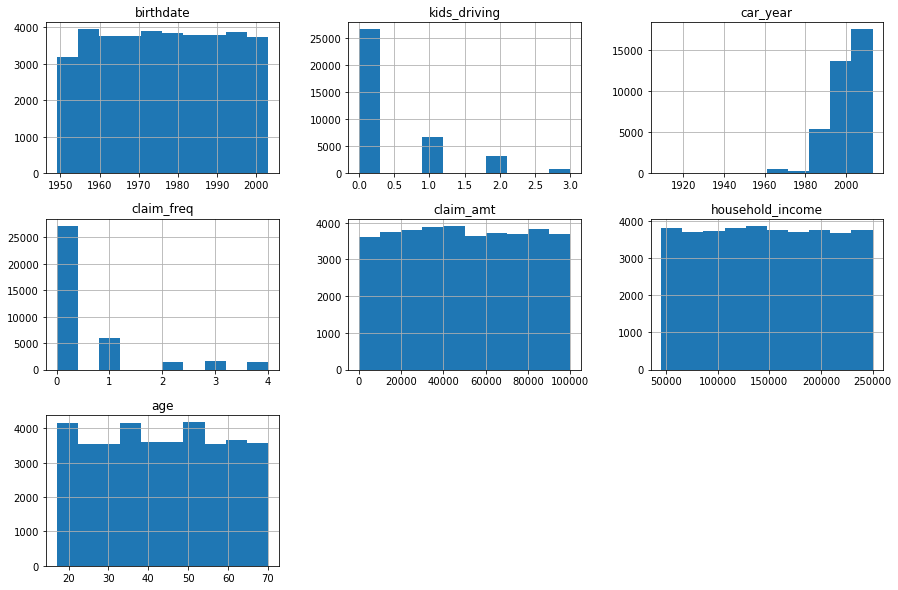

In [17]:
# a histogram of all the numeric variable
insurance.hist(figsize = (15,10));

Taking a deeper look into the distribution of some key variables in the dataset using matplotlib and seaborn

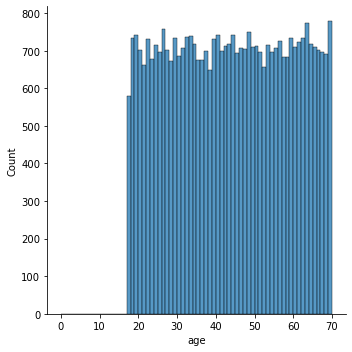

In [18]:
# distribution of the age on a normal scale
bin_edges = np.arange(0, insurance.age.max() + 1 , 1 )
sb.displot(insurance.age, bins = bin_edges, kde = False);

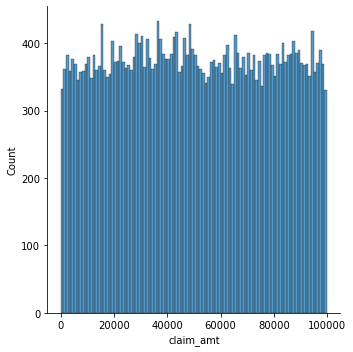

In [19]:
# distribution of the age on a normal scale

bin_edges = np.arange(0, insurance.claim_amt.max() + 1000 , 1000 )
sb.displot(insurance.claim_amt, bins = bin_edges, kde = False);

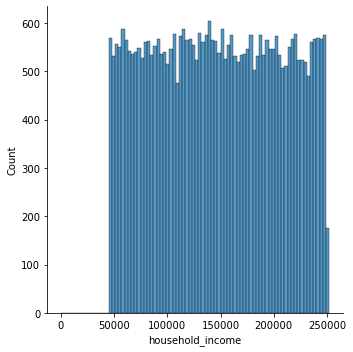

In [20]:
# distribution of the age on a normal scale
bin_edges = np.arange(0, insurance.household_income.max() + 3000 , 3000 )
sb.displot(insurance.household_income, bins = bin_edges, kde = False);

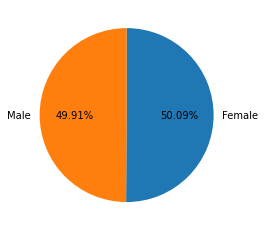

In [21]:
# Gender distribution

#summarizing the data
summarized_genders = insurance.gender.value_counts()

#plotting the pie
plt.pie(summarized_genders, labels = summarized_genders.index, startangle = 90, counterclock = False, autopct = "%.2f%%");

We had an almost equivalent gender distribution. 

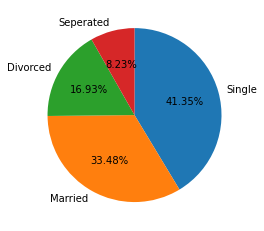

In [22]:
# Marital distribution

#summarizing the data
summarized_genders = insurance.marital_status.value_counts()

#plotting the pie
plt.pie(summarized_genders, labels = summarized_genders.index, startangle = 90, counterclock = False, autopct = "%.2f%%");

About half of the customers are single and less than one fourth of them are separated.

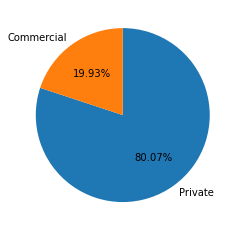

In [23]:
# car use distribution

#summarizing the data
summarized_genders = insurance.car_use.value_counts()

#plotting the pie
plt.pie(summarized_genders, labels = summarized_genders.index, startangle = 90, counterclock = False, autopct = "%.2f%%");

More than two-third of the customer's use their car for private purpose

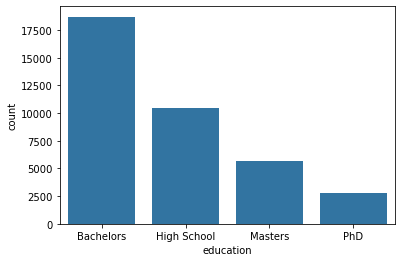

In [24]:
# education distribution of the customers
base_color = sb.color_palette()[0]
education_freq = insurance.education.value_counts()
education_order = education_freq.index
sb.countplot(data = insurance , x = 'education', color = base_color, order = education_order);

Most of the customers have a Bachelors degree

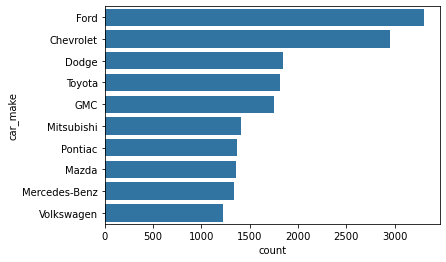

In [25]:
# Top 10 car make by frequency 
base_color = sb.color_palette()[0]
car_make_freq = insurance.car_make.value_counts()[:10]
car_make_freq_order = car_make_freq.index
sb.countplot(data = insurance , y = 'car_make', color = base_color, order = car_make_freq_order);

Ford is been used by most customers than any other car make

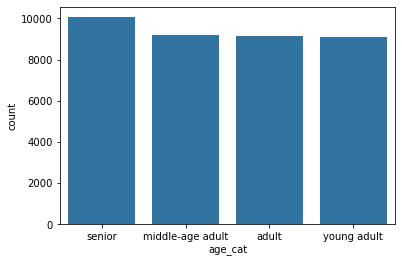

In [26]:
# age_category distribution of the customers
base_color = sb.color_palette()[0]
age_cat_freq = insurance.age_cat.value_counts()
age_cat_order = age_cat_freq.index
sb.countplot(data = insurance , x = 'age_cat', color = base_color, order = age_cat_order);

More of the customers are in the senior age category

### Summary of findings from the univariate exploration

- The male and female gender in the dataset are evenly distributed
- About half of the customers are single and less than one fourth of them are separated
- More than two-third of the customer's use their car for private purpose
- More of the customers have a Bachelors degree
- Ford is been used by more customers than any other car make
- More of the customers are in the senior age category

In [27]:
insurance.columns

Index(['ID', 'birthdate', 'marital_status', 'car_use', 'gender',
       'kids_driving', 'parent', 'education', 'car_make', 'car_model',
       'car_color', 'car_year', 'claim_freq', 'coverage_zone', 'claim_amt',
       'household_income', 'age', 'age_cat'],
      dtype='object')

## Bivariate Exploration
### To start off with, I want to look at the pairwise correlations present between features in the data.

In [28]:
numeric_vars = ['claim_freq', 'claim_amt', 'household_income', 'age', 'kids_driving']
categoric_vars = ['marital_status', 'car_use','gender', 'parent', 'education', 'coverage_zone', 'age_cat']

insurance.shape= (37542, 18)
insurance_samp.shape= (1000, 18)


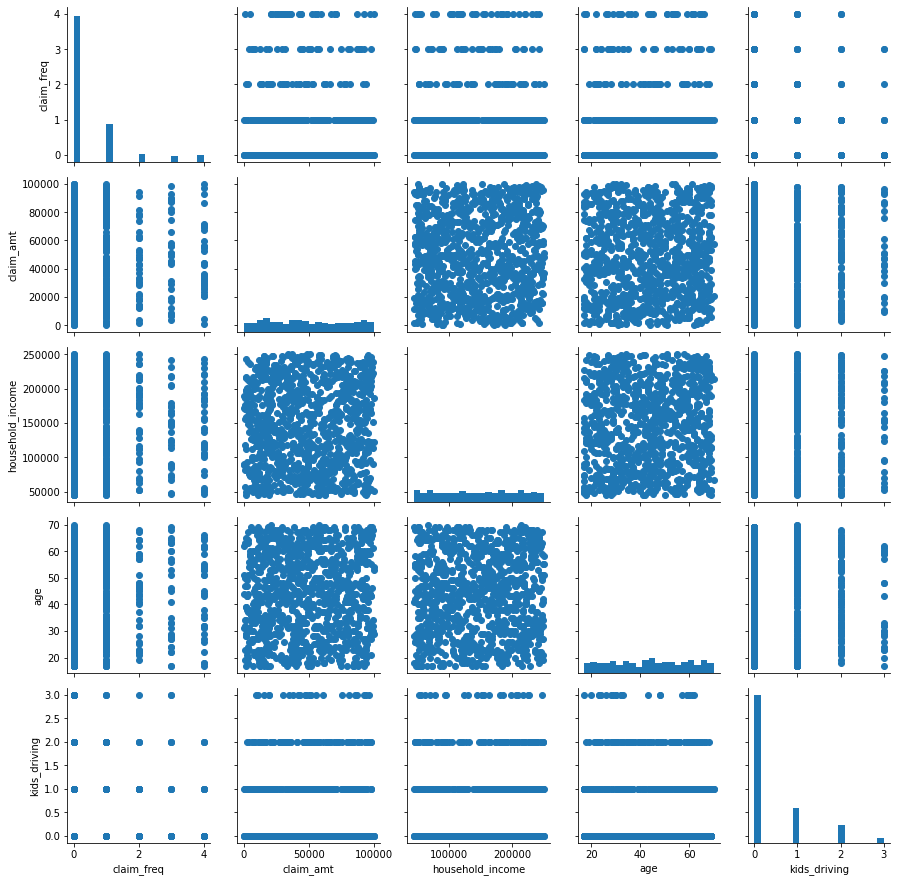

In [29]:
# using a plot matrix to show the pairwise relationship. A histogram in the diagonal and a scatter plot in the off diagonal

#sampling 1000 customers so that plots are clearer and they render faster
print("insurance.shape=",insurance.shape)
insurance_samp = insurance.sample(n=1000, replace = False)
print("insurance_samp.shape=",insurance_samp.shape)


g = sb.PairGrid(data = insurance_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

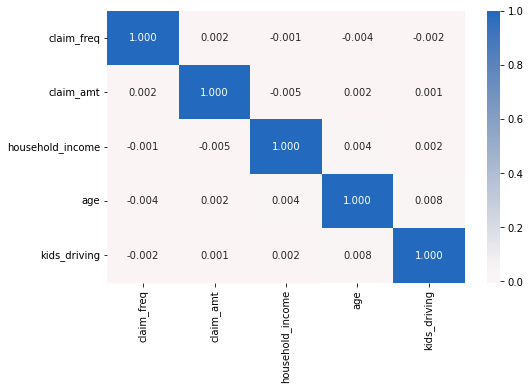

In [30]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(insurance[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

I wanted to check if there is some relationship between the numerical variables in the dataset. I initially thought that the claim freqency and claim amount will increase or decrease in the same direction (i.e, I was expecting a strong correlation between the two variables). There is no correlation between the variables in the plot

### Going further, I am going to check how these categorical varables relate to the claim frequency variable
- categoric_vars = 'marital_status', 'car_use','gender', 'parent', 'education', 'coverage_zone', 'age_cat'

sum gender
Female    9673
Male      9485
Name: claim_freq, dtype: int64
avg gender
Female    0.514357
Male      0.506245
Name: claim_freq, dtype: float64


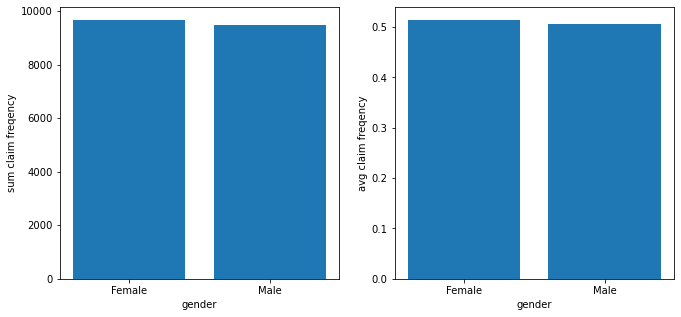

In [31]:
plt.figure(figsize = [11,5]) #setting the figure size

plt.subplot(1,2,1) # sum claim frequency against gender

# grouping the data by gender
gender_sum = insurance.groupby('gender')['claim_freq'].sum().sort_values(ascending = False)
print('sum', gender_sum)

#plotting the bars
plt.bar(gender_sum.index, gender_sum.values)
plt.ylabel('sum claim freqency')
plt.xlabel('gender');

plt.subplot(1,2,2) # average claim frequency against gender

# grouping the data by gender
gender_avg = insurance.groupby('gender')['claim_freq'].mean().sort_values(ascending = False)
print('avg', gender_avg)

#plotting the bars
plt.bar(gender_avg.index, gender_avg.values)
plt.ylabel('avg claim freqency')
plt.xlabel('gender');

The female gender is associated with
more claim freqency than the male gender. Though the difference in the average is quite infinitesimal. An analysis of means needs to be done to know the significance of this difference

sum age_cat
senior              5090
young adult         4710
adult               4688
middle-age adult    4670
Name: claim_freq, dtype: int64
avg age_cat
young adult         0.517185
adult               0.511344
middle-age adult    0.507058
senior              0.506115
Name: claim_freq, dtype: float64


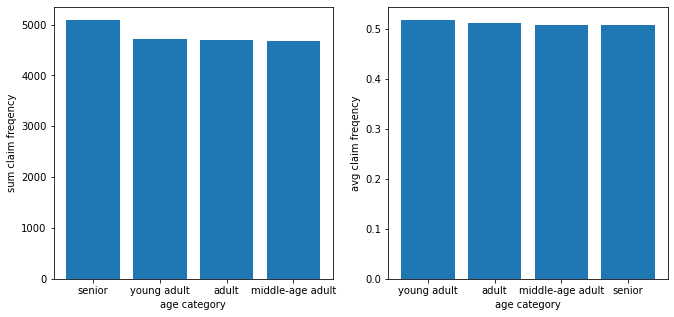

In [32]:
plt.figure(figsize = [11,5]) #setting the figure size

plt.subplot(1,2,1) # sum claim frequency against age category

# grouping the data by age_cat
age_cat_sum = insurance.groupby('age_cat')['claim_freq'].sum().sort_values(ascending = False)
print('sum', age_cat_sum)

#plotting the bars
plt.bar(age_cat_sum.index, age_cat_sum.values)
plt.ylabel('sum claim freqency')
plt.xlabel('age category');

plt.subplot(1,2,2) # average claim frequency against age category

# grouping the data by gender
age_cat_avg =insurance.groupby('age_cat')['claim_freq'].mean().sort_values(ascending = False)
print('avg', age_cat_avg)

# plotting the bars
plt.bar(age_cat_avg.index, age_cat_avg.values)
plt.ylabel('avg claim freqency')
plt.xlabel('age category');


The customers in the senior age category(56-70) have the highest sum of claim frequency while those in the those in the young adult age category(17-29 years) have the highest average claim freqency implying that though the count of young adults in the company is less than that of the seniors. It could also be that they have more claim frequencies per head. Infact, the senior age category which has the highest sum of claim frequency actually has the least average claim frequency.

From the average claim frequency bar, as the customer's age increases, the average claim freqency decreases but the difference between the average claim freqency of the categories might not be statistically significant.

sum marital_status
Single       7840
Married      6540
Divorced     3129
Seperated    1649
Name: claim_freq, dtype: int64
avg marital_status
Seperated    0.533657
Married      0.520286
Single       0.504992
Divorced     0.492213
Name: claim_freq, dtype: float64


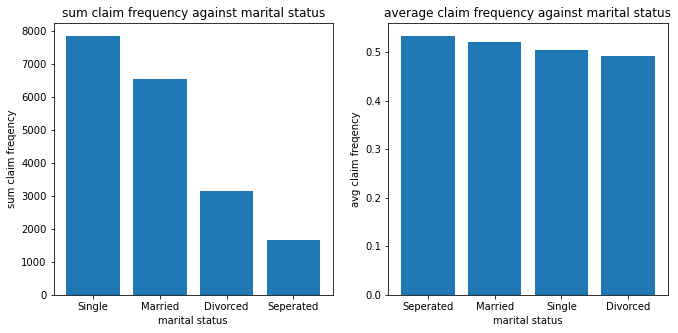

In [33]:
plt.figure(figsize = [11,5]) #setting the figure size

plt.subplot(1,2,1) # sum claim frequency against marital status

# grouping the data by marital_status
marital_status_sum = insurance.groupby('marital_status')['claim_freq'].sum().sort_values(ascending = False)
print('sum', marital_status_sum)

#plotting the bars
plt.bar(marital_status_sum.index, marital_status_sum.values)
plt.ylabel('sum claim freqency')
plt.xlabel('marital status')
plt.title('sum claim frequency against marital status');

plt.subplot(1,2,2) # average claim frequency against marital status

# grouping the data by marital status
marital_status_avg =insurance.groupby('marital_status')['claim_freq'].mean().sort_values(ascending = False)
print('avg', marital_status_avg)

# plotting the bars
plt.bar(marital_status_avg.index, marital_status_avg.values)
plt.ylabel('avg claim freqency')
plt.xlabel('marital status')
plt.title('average claim frequency against marital status');


Separated customers with the least sum of claim frequency have the highest average claim freqency implying that they have the least count and/or the highest claim frequency per head.

sum car_use
Private       15427
Commercial     3731
Name: claim_freq, dtype: int64
avg car_use
Private       0.513207
Commercial    0.498663
Name: claim_freq, dtype: float64


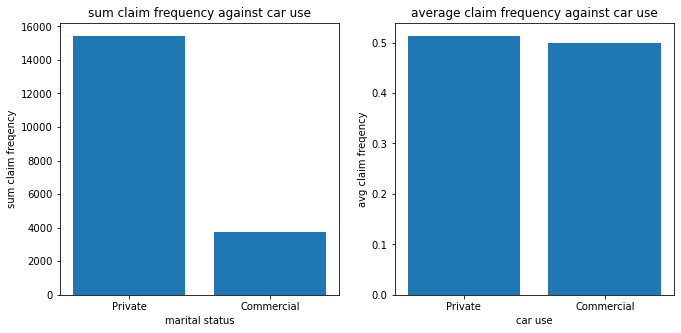

In [34]:
plt.figure(figsize = [11,5]) #setting the figure size

plt.subplot(1,2,1) # sum claim frequency against car use

# grouping the data by car use
car_use_sum = insurance.groupby('car_use')['claim_freq'].sum().sort_values(ascending = False)
print('sum', car_use_sum)

#plotting the bars
plt.bar(car_use_sum.index, car_use_sum.values)
plt.ylabel('sum claim freqency')
plt.xlabel('marital status')
plt.title('sum claim frequency against car use');

plt.subplot(1,2,2) # average claim frequency against car use

#grouping the data by car_use
car_use_avg = insurance.groupby('car_use')['claim_freq'].mean().sort_values(ascending = False)
print('avg', car_use_avg)

#plotting the bar graph
plt.bar(car_use_avg.index, car_use_avg.values)
plt.ylabel('avg claim freqency')
plt.xlabel('car use');
plt.title('average claim frequency against car use');


Though commercial car users had a very low sum of claim frquency when compared to that of the private car users but their average claim frequency was almost equivalent to that of the private car users. This is because the count of the commercial car users is quite small as compared to that of the private car users. Also, it could also be as a result of higher claim frequency per head of the commercial car users.


sum parent
No     10676
Yes     8482
Name: claim_freq, dtype: int64
avg parent
Yes    0.510656
No     0.510032
Name: claim_freq, dtype: float64


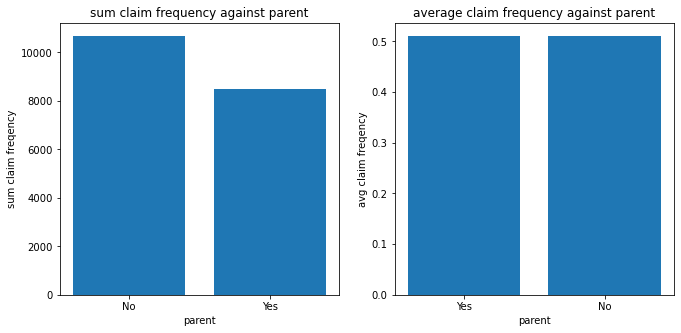

In [35]:
# Claim frequency and Parent

plt.figure(figsize = [11,5]) #setting the figure size

plt.subplot(1,2,1) # sum claim frequency against parent

# grouping the data by parent
parent_sum = insurance.groupby('parent')['claim_freq'].sum().sort_values(ascending = False)
print('sum', parent_sum)

#plotting the bars
plt.bar(parent_sum.index, parent_sum.values)
plt.ylabel('sum claim freqency')
plt.xlabel('parent')
plt.title('sum claim frequency against parent');

plt.subplot(1,2,2) # average claim frequency against parent

#grouping the data by car_use
parent_avg = insurance.groupby('parent')['claim_freq'].mean().sort_values(ascending = False)
print('avg', parent_avg)

#plotting the bar graph
plt.bar(parent_avg.index, parent_avg.values)
plt.ylabel('avg claim freqency')
plt.xlabel('parent');
plt.title('average claim frequency against parent');

Customers that are not parents have a higher sum of claim frequency than customers that are parents however the number of claim frequency per head of customers that are parents is quite higher than those that aren't and also their count is quite lower leading to them having an equivalent average claim frequency

sum education
Bachelors      9500
High School    5374
Masters        2902
PhD            1382
Name: claim_freq, dtype: int64
avg education
High School    0.514800
Masters        0.514539
Bachelors      0.507994
PhD            0.500362
Name: claim_freq, dtype: float64


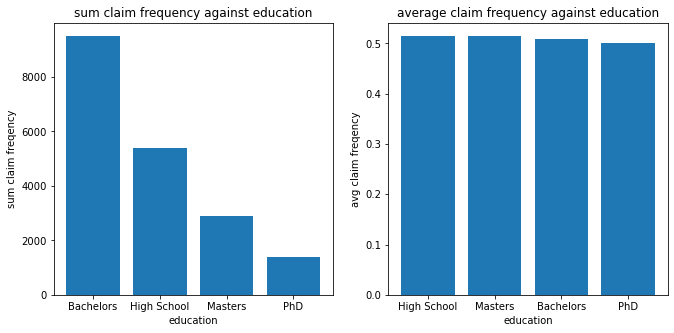

In [36]:
# Claim frequency and Education

plt.figure(figsize = [11,5]) #setting the figure size

plt.subplot(1,2,1) # sum claim frequency against education

# grouping the data by education
education_sum = insurance.groupby('education')['claim_freq'].sum().sort_values(ascending = False)
print('sum', education_sum)

#plotting the bars
plt.bar(education_sum.index, education_sum.values)
plt.ylabel('sum claim freqency')
plt.xlabel('education')
plt.title('sum claim frequency against education');

plt.subplot(1,2,2) # average claim frequency against education

#grouping the data by car_use
education_avg = insurance.groupby('education')['claim_freq'].mean().sort_values(ascending = False)
print('avg', education_avg)

#plotting the bar graph
plt.bar(education_avg.index, education_avg.values)
plt.ylabel('avg claim freqency')
plt.xlabel('education');
plt.title('average claim frequency against education');

The customers with PhD degree had the least sum of claim frequency but apparently the average claim freqency for the four education categories are slightly equivalent. This is because of the number of claim frequency per head effect and the number of customers for each category in the dataset.

In [37]:
insurance.query('education == "PhD"').claim_freq.value_counts()

0    2008
1     444
3     110
4     104
2      96
Name: claim_freq, dtype: int64

The customers with PhD degree have the least average claim frequency

sum coverage_zone
Suburban        3883
Highly Urban    3881
Urban           3856
Rural           3809
Highly Rural    3729
Name: claim_freq, dtype: int64
avg coverage_zone
Suburban        0.520091
Highly Urban    0.516503
Urban           0.508171
Rural           0.506381
Highly Rural    0.500403
Name: claim_freq, dtype: float64


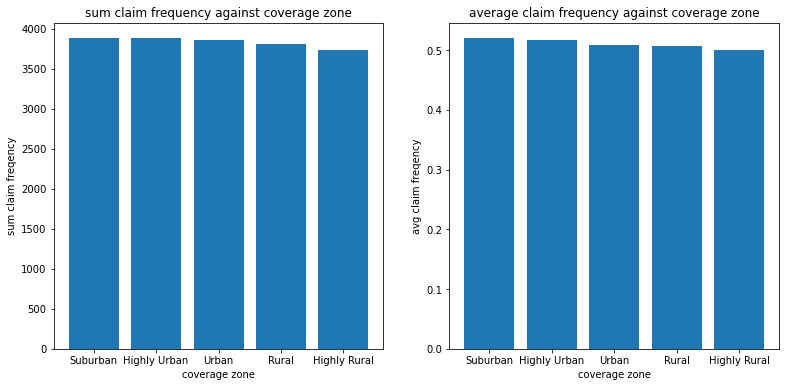

In [38]:
# Claim frequency and Coverage zone

plt.figure(figsize = [13,6]) #setting the figure size

plt.subplot(1,2,1) # sum claim frequency against coverage zone

# grouping the data by education
coverage_zone_sum = insurance.groupby('coverage_zone')['claim_freq'].sum().sort_values(ascending = False)
print('sum', coverage_zone_sum)

#plotting the bars
plt.bar(coverage_zone_sum.index, coverage_zone_sum.values)
plt.ylabel('sum claim freqency')
plt.xlabel('coverage zone')
plt.title('sum claim frequency against coverage zone');

plt.subplot(1,2,2) # average claim frequency against coverage zone

#grouping the data by car_use
coverage_zone_avg = insurance.groupby('coverage_zone')['claim_freq'].mean().sort_values(ascending = False)
print('avg', coverage_zone_avg)

#plotting the bar graph
plt.bar(coverage_zone_avg.index, coverage_zone_avg.values)
plt.ylabel('avg claim freqency')
plt.xlabel('coverage zone');
plt.title('average claim frequency against coverage zone');

The Suburban region have the highest sum and average claim frequency. The coverage zones follow the same trend in terms of the sum and the average claim frequencies

### Now, I am going to check the relationship between the variables that depict car properties and claim freqency  and claim amount. 
- car property variables: car_make, car_model, car_year
- Since these variables contain many unique values, I am going to limit the exploration to just the top 10 for each of them

sum car_make
Ford             1694
Chevrolet        1457
Dodge             933
Toyota            861
GMC               854
Pontiac           737
Mitsubishi        709
Volkswagen        690
Mercedes-Benz     690
Mazda             680
Name: claim_freq, dtype: int64
sum car_make
Merkur      1.600000
Corbin      0.800000
Bugatti     0.750000
Geo         0.745455
Morgan      0.714286
Hummer      0.625000
Cadillac    0.614731
Fillmore    0.600000
Scion       0.591837
Maserati    0.582938
Name: claim_freq, dtype: float64


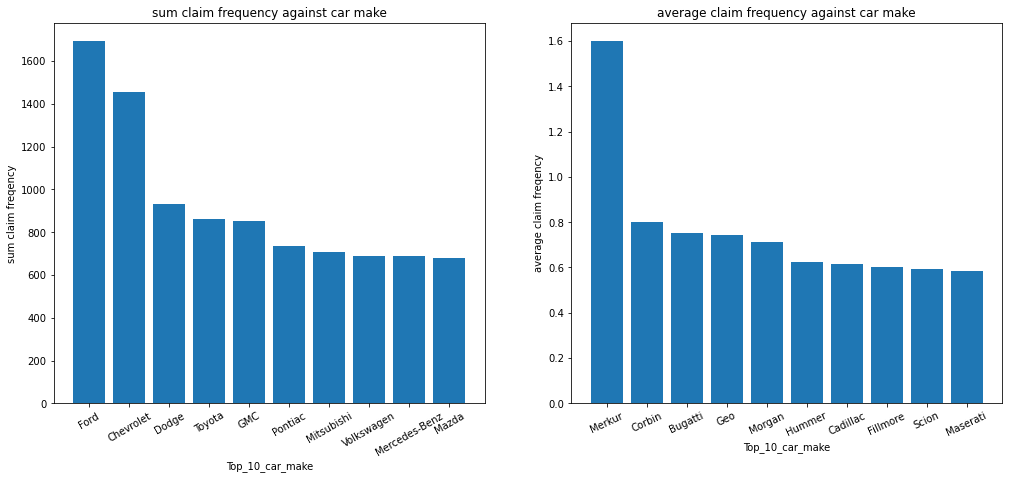

In [39]:
#Claim frequency and Car make

plt.figure(figsize= [17,7]) #setting the figure size

plt.subplot(1,2,1) # sum claim frequency against car make

#grouping the data by car_make
Top_10_car_make_sum = insurance.groupby('car_make')['claim_freq'].sum().sort_values(ascending = False)[:10]
print('sum', Top_10_car_make_sum)

#plotting the bar graph
plt.bar(Top_10_car_make_sum.index, Top_10_car_make_sum.values)
plt.ylabel('sum claim freqency')
plt.xlabel('Top_10_car_make')
plt.title('sum claim frequency against car make')
plt.xticks(rotation = 30);

plt.subplot(1,2,2) # average claim frequency against car make

#grouping the data by car make
Top_10_car_make_avg = insurance.groupby('car_make')['claim_freq'].mean().sort_values(ascending = False)[:10]
print('sum', Top_10_car_make_avg)

#plotting the bar graph
plt.bar(Top_10_car_make_avg.index, Top_10_car_make_avg.values)
plt.ylabel('average claim freqency')
plt.xlabel('Top_10_car_make')
plt.title('average claim frequency against car make')
plt.xticks(rotation = 25);


Ford has the highest claim frequency while Merkur has the highest average claim frequency

sum car_make
Ford             1.655833e+08
Chevrolet        1.478564e+08
Dodge            9.291236e+07
Toyota           9.016172e+07
GMC              8.739633e+07
Mitsubishi       7.180753e+07
Mazda            6.889169e+07
Pontiac          6.793400e+07
Mercedes-Benz    6.702320e+07
Volkswagen       6.180040e+07
Name: claim_amt, dtype: float64
sum car_make
Hillman       79049.426667
Holden        61926.400952
Corbin        61555.476000
Daihatsu      58176.026667
Fairthorpe    57590.200000
Ram           56268.004054
MG            53763.170000
Maserati      53617.253697
CitroÃ«n      53194.887647
Jeep          52762.369167
Name: claim_amt, dtype: float64


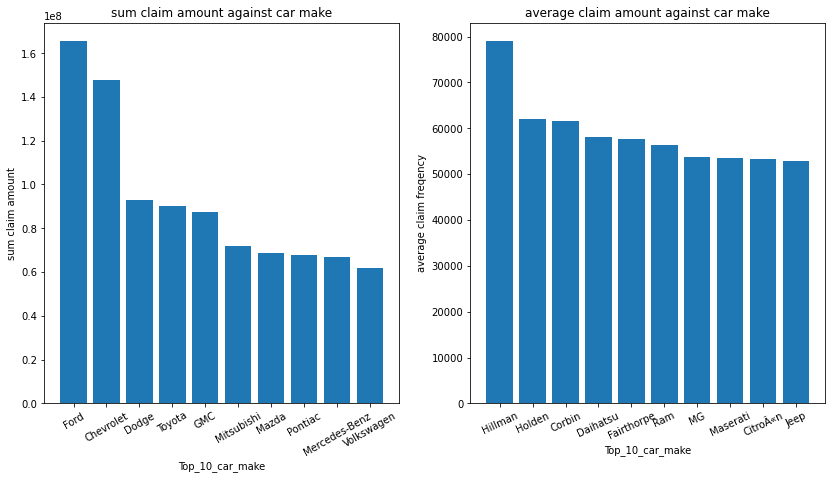

In [40]:
#Claim amount and Car make

plt.figure(figsize= [14,7]) #setting the figure size

plt.subplot(1,2,1) # sum claim amount against car make

#grouping the data by car_make
Top_10_car_make_sum = insurance.groupby('car_make')['claim_amt'].sum().sort_values(ascending = False)[:10]
print('sum', Top_10_car_make_sum)

#plotting the bar graph
plt.bar(Top_10_car_make_sum.index, Top_10_car_make_sum.values)
plt.ylabel('sum claim amount')
plt.xlabel('Top_10_car_make')
plt.title('sum claim amount against car make')
plt.xticks(rotation = 30);

plt.subplot(1,2,2) # average claim amount against car make

#grouping the data by car make
Top_10_car_make_avg = insurance.groupby('car_make')['claim_amt'].mean().sort_values(ascending = False)[:10]
print('sum', Top_10_car_make_avg)

#plotting the bar graph
plt.bar(Top_10_car_make_avg.index, Top_10_car_make_avg.values)
plt.ylabel('average claim freqency')
plt.xlabel('Top_10_car_make')
plt.title('average claim amount against car make')
plt.xticks(rotation = 25);

Ford has the highest sum of claim amount while Hilman has the highest average claim amount

In [41]:
insurance.car_year.describe()

count    37542.000000
mean      2000.293005
std          9.045441
min       1909.000000
25%       1995.000000
50%       2002.000000
75%       2007.000000
max       2013.000000
Name: car_year, dtype: float64

sum car_year
2006    1039
2011     938
2009     925
2007     898
2008     894
2005     860
2010     850
2012     838
2003     824
1993     816
Name: claim_freq, dtype: int64
sum car_year
1926    1.000000
1981    0.840000
1956    0.833333
1967    0.680000
1958    0.666667
1979    0.607143
1980    0.600000
1977    0.586957
1909    0.571429
2003    0.560926
Name: claim_freq, dtype: float64


''

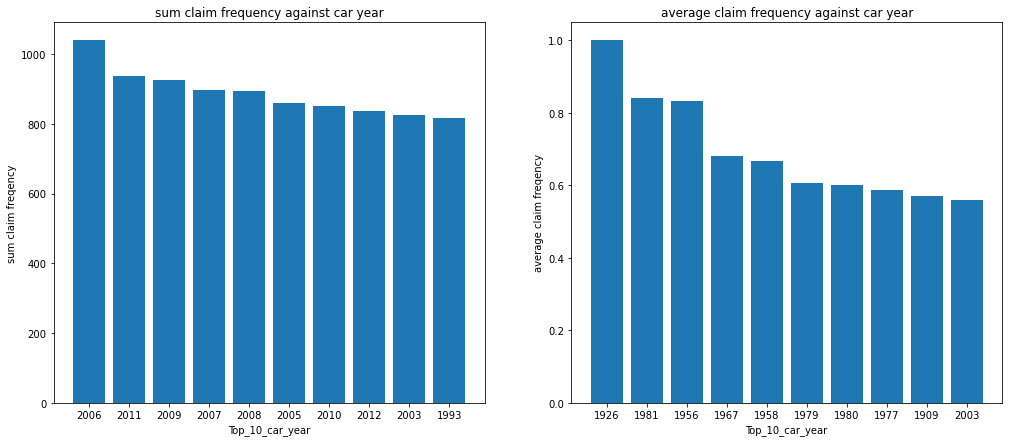

In [42]:
#Claim frequency and Car year

plt.figure(figsize= [17,7]) #setting the figure size

plt.subplot(1,2,1) # sum claim frequency against car year

#grouping the data by car_make
Top_10_car_year_sum = insurance.groupby('car_year')['claim_freq'].sum().sort_values(ascending = False)[:10]
print('sum', Top_10_car_year_sum)



# Create numerical positions for the bars
x_positions = np.arange(len(Top_10_car_year_sum.index))

#plotting the bar graph
plt.bar(x_positions, Top_10_car_year_sum.values)
plt.xticks(x_positions, Top_10_car_year_sum.index)
plt.ylabel('sum claim freqency')
plt.xlabel('Top_10_car_year')
plt.title('sum claim frequency against car year') 
;

plt.subplot(1,2,2) # average claim frequency against car make

#grouping the data by car make
Top_10_car_year_avg = insurance.groupby('car_year')['claim_freq'].mean().sort_values(ascending = False)[:10]
print('sum', Top_10_car_year_avg)

# Create numerical positions for the bars
x_positions = np.arange(len(Top_10_car_year_avg.index))

#plotting the bar graph
plt.bar(x_positions, Top_10_car_year_avg.values)
plt.xticks(x_positions, Top_10_car_year_avg.index)
plt.ylabel('average claim freqency')
plt.xlabel('Top_10_car_year')
plt.title('average claim frequency against car year')
;


Older model cars have greater average claim frequency than newer models. However, since the newer car models are more in number than the older car models, their sum of claim frequency is higher than that of the older car models.

sum car_year
2006    97397487.54
2009    90512309.66
2008    89889342.67
2011    86481083.72
2010    85855203.10
2007    85648892.70
2004    85204953.52
2012    83842742.24
2005    81056088.79
1993    76940719.39
Name: claim_amt, dtype: float64
sum car_year
1950    79049.426667
1974    61584.947000
1948    58481.190000
1980    57445.832571
1972    56149.655000
1964    54328.300435
1978    53916.982400
1965    53706.379273
1954    52876.774706
1973    52634.385152
Name: claim_amt, dtype: float64


''

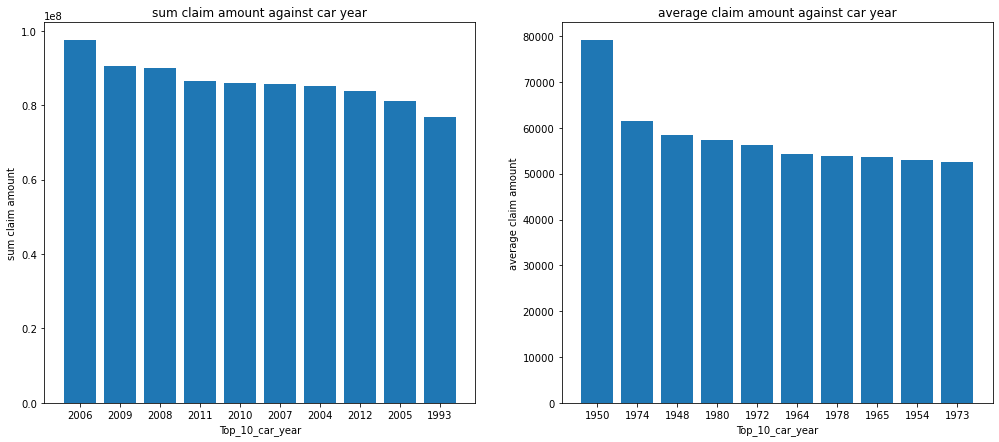

In [43]:
#Claim amount and Car year

plt.figure(figsize= [17,7]) #setting the figure size

plt.subplot(1,2,1) # sum claim amount against car year

#grouping the data by car_make
Top_10_car_year_sum = insurance.groupby('car_year')['claim_amt'].sum().sort_values(ascending = False)[:10]
print('sum', Top_10_car_year_sum)



# Create numerical positions for the bars
x_positions = np.arange(len(Top_10_car_year_sum.index))

#plotting the bar graph
plt.bar(x_positions, Top_10_car_year_sum.values)
plt.xticks(x_positions, Top_10_car_year_sum.index)
plt.ylabel('sum claim amount')
plt.xlabel('Top_10_car_year')
plt.title('sum claim amount against car year') 
;

plt.subplot(1,2,2) # average claim amount against car year

#grouping the data by car make
Top_10_car_year_avg = insurance.groupby('car_year')['claim_amt'].mean().sort_values(ascending = False)[:10]
print('sum', Top_10_car_year_avg)

# Create numerical positions for the bars
x_positions = np.arange(len(Top_10_car_year_avg.index))

#plotting the bar graph
plt.bar(x_positions, Top_10_car_year_avg.values)
plt.xticks(x_positions, Top_10_car_year_avg.index)
plt.ylabel('average claim amount')
plt.xlabel('Top_10_car_year')
plt.title('average claim amount against car year')
;


Older car models claim more money than newer car models. Though the sum of the claim amount for newer car models is higher than that of the older car models, the average of the claim amount of the older car models is greater than those of the newer models.

### Summary of findings from the bivariate exploration
- There is no correlation between the variables in the plot. I initially thought that the claim freqency and claim amount will increase or decrease in the same direction (i.e, I was expecting a strong correlation between the two variables). 

- The female gender is associated to more claim freqency than the male gender. Though the difference in the average is quite infinitesimal. An analysis of means needs to be done to know the significance of this difference

- The customers in the senior age category(56-70) have the highest sum of claim frequency while those in the those in the young adult age category(17-29 years) have the highest average claim freqency implying that though the count of young adults in the company is less than that of the seniors. It could also be that they have more claim frequencies per head. Infact, the senior age category which has the highest sum of claim frequency actually has the least average claim frequency.

- Separated customers with the least sum of claim frequency have the highest average claim freqency implying that they have the least count and/or the highest claim frequency per head.

- Though commercial car users had a very low sum of claim frquency when compared to that of the private car users but their average claim frequency was almost equivalent to that of the private car users. This is because the count of the commercial car users is quite small as compared to that of the private car users. Also, it could also be as a result of higher claim frequency per head of the commercial car users.

- Customers that are not parents have a higher sum of claim frequency than customers that are parents however the number of claim frequency per head of customers that are parents is quite higher than those that aren't and also their count is quite lower leading to them having an equivalent average claim frequency

- The customers with PhD degree had the least sum of claim frequency but apparently the average claim freqency for the four education categories are slightly equivalent. This is because of the number of claim frequency per head effect and the number of customers for each category in the dataset.

- The Suburban region have the highest sum and average claim frequency. The coverage zones follow the same trend in terms of the sum and the average claim frequencies.

- Ford has the highest claim frequency while Merkur has the highest average claim frequency.

- Ford has the highest sum of claim amount while Hilman has the highest average claim amount.

- Older model cars have greater average claim frequency than newer models. However, since the newer car models are more in number than the older car models, their sum of claim frequency is higher than that of the older car models. 

- Older car models claim more money than newer car models. Though the sum of the claim amount for newer car models is higher than that of the older car models, the average of the claim amount of the older car models is greater than those of the newer models.



In [44]:
insurance.columns

Index(['ID', 'birthdate', 'marital_status', 'car_use', 'gender',
       'kids_driving', 'parent', 'education', 'car_make', 'car_model',
       'car_color', 'car_year', 'claim_freq', 'coverage_zone', 'claim_amt',
       'household_income', 'age', 'age_cat'],
      dtype='object')

## Multivariate Exploration

- I exployed the multivariate relationship between coverage zone, car use and claim amount.
- I also check the distribution of household income across the education and parent categories of the customers
- The relationship between age, gender and claim frequency

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


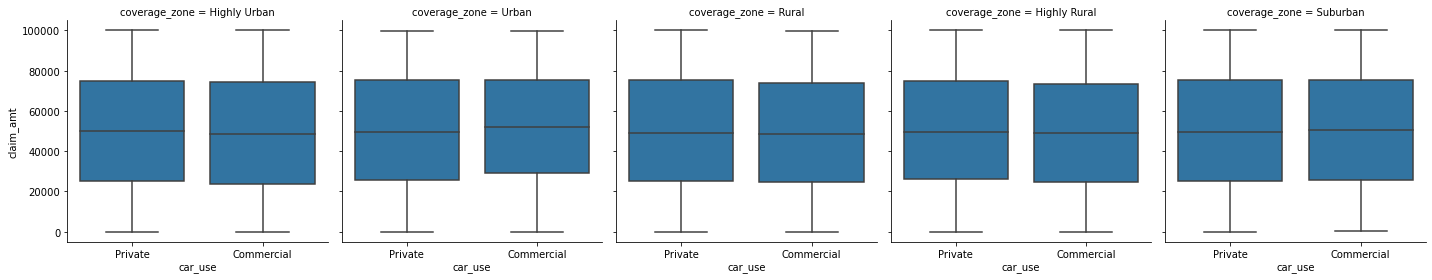

In [45]:
# gender and duration, user type
g = sb.FacetGrid(data = insurance, col = 'coverage_zone', height = 4)
g.map(sb.boxplot, 'car_use', 'claim_amt');


For Highly urban coverage zone, vehicles used for private activities had a higher median claim amount while for Urban coverage zone, those used for commercial activities had a higher claim amount.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


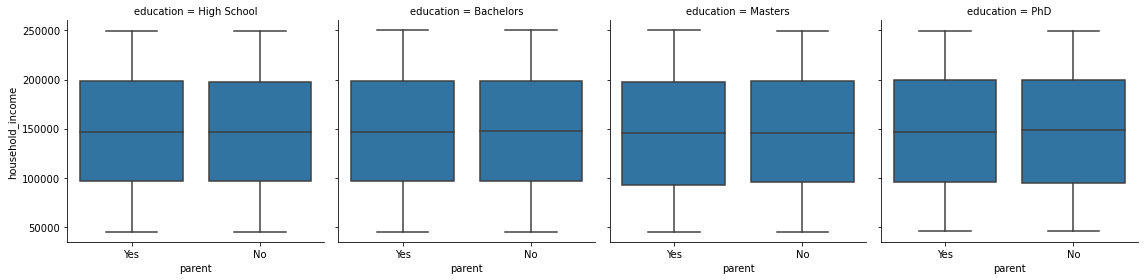

In [46]:
g = sb.FacetGrid(data = insurance, col = 'education', height = 4)
g.map(sb.boxplot, 'parent', 'household_income')

The distribution of the household income across the education and parent categories of the customers is almost equivalent with rougly the same median household income.

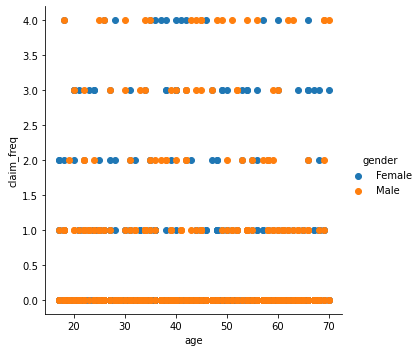

In [47]:
sample = insurance.sample(1000)

g = sb.FacetGrid(data = sample, hue = 'gender', height = 5)
g.map(plt.scatter, 'age', 'claim_freq')
g.add_legend();

There is a very weak or no relationship between age and claim frequency although, the female gender seems to be associated with higher claim freqencies

### Summary of findings from the multivariate exploration
- For Highly urban coverage zone, vehicles used for private activities had a higher median claim amount while for Urban coverage zone, those used for commercial activities had a higher claim amount.
- The distribution of the household income across the education and parent categories of the customers is almost equivalent with rougly the same median household income.
-  There is a very weak or no relationship between age and claim frequency although, the female gender seems to be associated with higher claim freqencies

## KEY INSIGHTS
- Ford is the car make used by most customers 
- Unexpectedly, there is no correlation between variables in the data even claim frequency and claim amount
- Ford has the highest claim frequency and highest claim amount while Merkur has the highest average claim frequency and Hilman has the highest average claim amount.
- Coverage zone has infinitesimal or no influence on claim frequency and amount
- Customers education level does not affect claim frequency
- Car use has infinitesimal effect on claim frequency
- Whether a customer is a parent or not has little or no effect on claim frequency
- Older car models claim more money than newer car models. Though the sum of the claim amount for newer car models is higher than that of the older car models, the average of the claim amount of the older car models is greater than those of the newer models.
- There might be a relationship between coverage zone, car use and claim amont when looked at together.


## CAVEATS
- Some of the findings needed to be comfirmed with some statistical test.

## Summary Dashboard
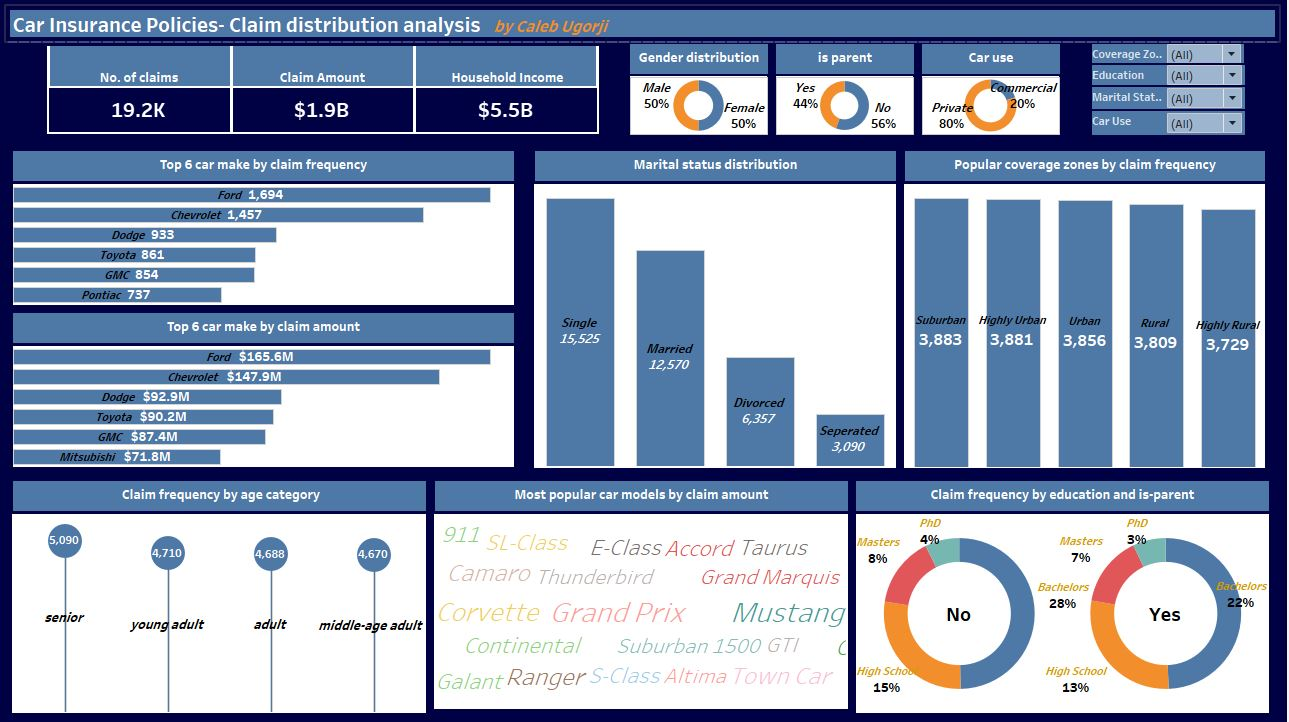

- Click to interact with the dashboard [interactive view](https://public.tableau.com/app/profile/caleb.chijindu.ugorji/viz/carinsurancerough/Dashboard1?publish=yes)


### Let's connect on social media

- [linkedIn](https://www.linkedin.com/in/caleb-ugorji)
- [Twitter](https://twitter.com/calebugorji021)
- [Github](https://github.com/DataStance1)